In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset("CRUTEM.5.0.1.0.anomalies.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:         (time: 2061, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-09-16
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tas             (time, latitude, longitude) float64 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      CRUTEM5 air temperature at 2m
    history:      Data set built at: 2021-10-21T19:03:35+00:00
    institution:  Climatic Research Unit, University of East Anglia/Met Offic...
    licence:      CRUTEM5 is licensed under the Open Government Licence v3.0 ...
    reference:    Osborn, T. J., P. D. Jones, D. H. Lister, C. P. Morice, I. ...
    source:       
    title:        CRUTEM5 air temperature over land
    version:      CRUTEM.5.0.1.0
    Conventions:  CF-1.7

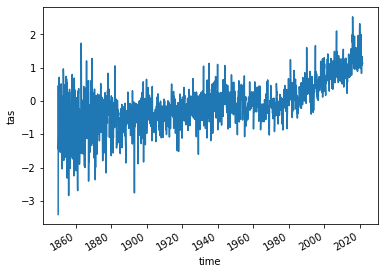

In [3]:
ds.tas.mean(dim=('longitude', 'latitude')).plot()

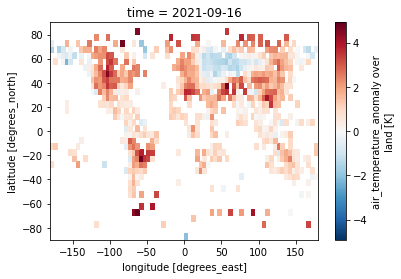

In [4]:
ds.tas[-1].plot()

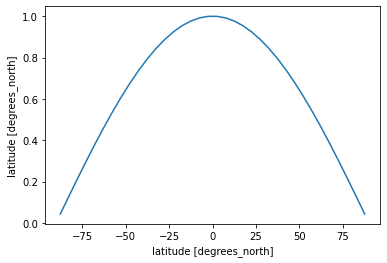

In [5]:
weights = np.cos(np.deg2rad(ds.latitude))
weights.dims
weights.plot()

Text(0.5, 1.0, 'Correct global mean SST')

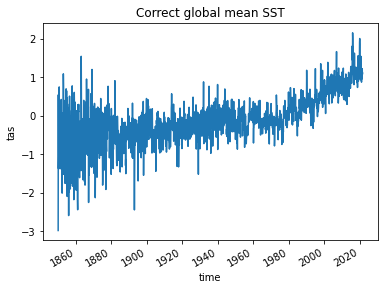

In [6]:
tas_weighted = ds.tas.weighted(weights)
tas_weighted.mean(dim=('longitude', 'latitude')).plot()
plt.title("Correct global mean SST")

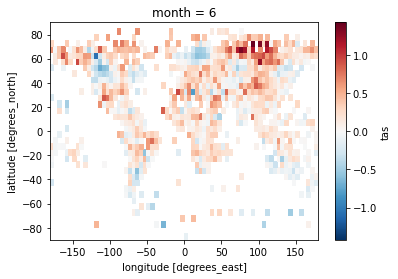

In [7]:
tas_clim = ds.tas.groupby('time.month').mean()
tas_clim.sel(month=6).plot()

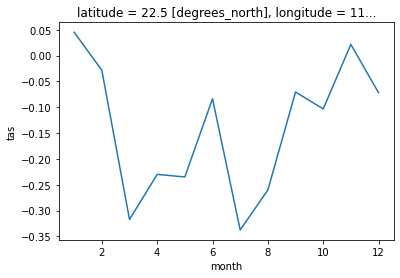

In [8]:
tas_clim.sel(longitude=114.55, latitude=22.5, method='nearest').plot()

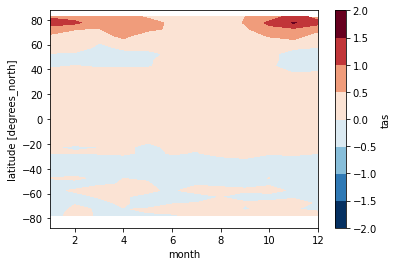

In [9]:
tas_clim.mean(dim='longitude').plot.contourf(x='month',levels=8)